# Get the Data

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Doubt**: File size of merged_2.csv and e1_merged.csv are different.  
**Conjeture**: Daniel Moreno: I think that experiment 1 can be greatly affected by the conditions of the day the measurements were taken.  However, if it is combined with other samples of the same plastic, my intuition tells me that it should be much more reliable

In [6]:
#train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/merged_2.csv', sep=';')
train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e1_merged.csv', sep=';')
train.columns

Index(['Sample', 'Frequency (GHz)', 'LG (mV)', 'HG (mV)', 'Thickness (mm)'], dtype='object')

Samples has serveral Thickness

In [7]:
train['Thickness (mm)'].value_counts().index.sort_values().tolist()

[0.0, 0.04, 0.07, 0.1, 0.2, 0.29, 0.36, 0.57, 1.85, 2.05, 2.25, 3.0]

51 frecuencies (Ghz)

In [8]:
train['Frequency (GHz)'].value_counts().index.sort_values()

Index([100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0,
       200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0,
       300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0,
       400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0,
       500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0,
       600.0],
      dtype='float64', name='Frequency (GHz)')

15 types of plastic

In [9]:
train['Sample'].value_counts().index.sort_values()

Index(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1',
       'M1', 'N1', 'REF'],
      dtype='object', name='Sample')

### Add data of Experiments 2, 3 and 4
**TODO**: Add temparature and RH to experiments 3 and 4

In [10]:
train_e1 = train.copy()
train_e1 = train_e1.drop(columns=['Thickness (mm)']) # Remove `Thickness (mm)`

train_e1['num_experiment'] = 'e1'
train_e1['Sample_original'] = 'None'
train_e1['Integration_Time_(msg)'] = 5

# ['E1', 'H1', 'REF']
train_e2 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e2_merged.csv', sep=';') 
train_e2['num_experiment'] = 'e2'
train_e2['Sample_original'] = 'None'
train_e2['Integration_Time_(msg)'] = 5

# ['REF_1', 'REF_10', 'REF_11', 'REF_12', 'REF_13', 'REF_14', 'REF_15', 'REF_2', 'REF_3', 'REF_4', 'REF_5', 'REF_6', 'REF_7', 'REF_8', 'REF_9']
train_e3 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e3_merged.csv', sep=',') 
train_e3['num_experiment'] = 'e3'
train_e3['Sample_original'] = train_e3['Sample']
train_e3['Sample'] = 'REF'
train_e3['Integration_Time_(msg)'] = 5

# ['B1_12', 'B1_2', 'B1_5', 'B1_9', 'C1_11', 'C1_14', 'C1_4', 'C1_7', 'E3_10', 'E3_13', 'E3_3', 'E3_6', 'REF_1', 'REF_15', 'REF_8']
train_e4 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e4_merged.csv', sep=',')
train_e4['num_experiment'] = 'e4'
train_e4['Sample_original'] = train_e4['Sample']
train_e4['Integration_Time_(msg)'] = 20

# ['B1_17', 'B1_20', 'C1_19', 'C1_22', 'E3_18', 'E3_21', 'REF_16', 'REF_23']
train_e4_v2 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e4_v2_merged.csv', sep=',')
train_e4_v2['num_experiment'] = 'e4_v2'
train_e4_v2['Sample_original'] = train_e4_v2['Sample']
train_e4_v2['Integration_Time_(msg)'] = 20

Replace name of Sample from experiment 4 by name of experiment 1

In [11]:
df_temp = train_e4.query('Sample.str.startswith("B1")', engine="python")
df_temp = df_temp.drop(columns=['Sample'])
df_temp['Sample'] = 'B1'
df_temp2 = train_e4.query('Sample.str.startswith("C1")', engine="python")
df_temp2 = df_temp2.drop(columns=['Sample'])
df_temp2['Sample'] = 'C1'
df_temp3 = train_e4.query('Sample.str.startswith("E3")', engine="python")
df_temp3 = df_temp3.drop(columns=['Sample'])
df_temp3['Sample'] = 'E1'
df_temp4 = train_e4.query('Sample.str.startswith("REF")', engine="python")
df_temp4 = df_temp4.drop(columns=['Sample'])
df_temp4['Sample'] = 'REF'
train_e4 = pd.concat([df_temp, df_temp2, df_temp3, df_temp4]).sort_index()

In [12]:
df_temp = train_e4_v2.query('Sample.str.startswith("B1")', engine="python")
df_temp = df_temp.drop(columns=['Sample'])
df_temp['Sample'] = 'B1'
df_temp2 = train_e4_v2.query('Sample.str.startswith("C1")', engine="python")
df_temp2 = df_temp2.drop(columns=['Sample'])
df_temp2['Sample'] = 'C1'
df_temp3 = train_e4_v2.query('Sample.str.startswith("E3")', engine="python")
df_temp3 = df_temp3.drop(columns=['Sample'])
df_temp3['Sample'] = 'E1'
df_temp4 = train_e4_v2.query('Sample.str.startswith("REF")', engine="python")
df_temp4 = df_temp4.drop(columns=['Sample'])
df_temp4['Sample'] = 'REF'
train_e4_v2 = pd.concat([df_temp, df_temp2, df_temp3, df_temp4]).sort_index()

In [13]:
train_e1['index_original'] = train_e1.index
train_e1.head()


,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg),index_original
0,A1,100.0,-7.080942,-0.854611,e1,None,5,0
1,A1,100.0,67.024785,0.244141,e1,None,5,1
2,A1,100.0,124.893178,-1.098776,e1,None,5,2
3,A1,100.0,91.075571,0.000000,e1,None,5,3
4,A1,100.0,48.956174,0.122094,e1,None,5,4


In [14]:
train_e2['index_original'] = train_e2.index
train_e2.head()

,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg),index_original
0,E1,100.0,27.469173,0.976682,e2,None,5,0
1,E1,100.0,70.931511,-0.366259,e2,None,5,1
2,E1,100.0,1.342937,-0.488353,e2,None,5,2
3,E1,100.0,31.253815,-0.122094,e2,None,5,3
4,E1,100.0,48.467830,0.488353,e2,None,5,4


In [15]:
train_e3['index_original'] = train_e3.index
train_e3.head()


,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg),index_original
0,REF,100.0,1.098767,0.000012,e3,REF_1,5,0
1,REF,100.0,0.854596,0.244176,e3,REF_1,5,1
2,REF,100.0,0.976682,0.610411,e3,REF_1,5,2
3,REF,100.0,1.709193,-0.244164,e3,REF_1,5,3
4,REF,100.0,-0.122085,-0.488341,e3,REF_1,5,4


In [16]:
train_e4['index_original'] = train_e4.index
train_e4.head()


,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg),Sample,index_original
0,100.0,35.923574,-0.335747,e4,REF_1,20,REF,0
1,100.0,58.600903,0.763011,e4,REF_1,20,REF,1
2,100.0,70.473691,0.152630,e4,REF_1,20,REF,2
3,100.0,56.220242,0.061041,e4,REF_1,20,REF,3
4,100.0,46.575510,0.579929,e4,REF_1,20,REF,4


In [17]:
train_e4_v2['index_original'] = train_e4_v2.index
train_e4_v2.head()


,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg),Sample,index_original
0,100.0,-0.640947,25.027469,e4_v2,B1_17,20,B1,0
1,100.0,0.244170,23.684531,e4_v2,B1_17,20,B1,1
2,100.0,-0.122085,25.027469,e4_v2,B1_17,20,B1,2
3,100.0,1.159810,21.639604,e4_v2,B1_17,20,B1,3
4,100.0,0.213649,26.248321,e4_v2,B1_17,20,B1,4


In [31]:
train_get = pd.concat([train_e1, train_e2, train_e3, train_e4, train_e4_v2])
train_get = train_get.rename(columns = {'Sample':'target', 'Frequency (GHz)': 'freq', 'Integration_Time_(msg)': 'int_time' }).drop(columns=['index_original'])                                                                                  
train_get.head()



,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time
0,A1,100.0,-7.080942,-0.854611,e1,None,5
1,A1,100.0,67.024785,0.244141,e1,None,5
2,A1,100.0,124.893178,-1.098776,e1,None,5
3,A1,100.0,91.075571,0.000000,e1,None,5
4,A1,100.0,48.956174,0.122094,e1,None,5


In [19]:
train_get['num_experiment'].value_counts()

num_experiment
e1       2420625
e2        986224
e4        439648
e3        424998
e4_v2     250646
Name: count, dtype: int64

## Convert the data to a format you can easily manipulate



In [20]:
#train = pd.concat([train[['Frequency (GHz)', 'LG (mV)', 'HG (mV)']],train[['target']]], axis=1)
#train_get.to_csv('all-experiment_15_types.csv', index=False)


Select only tree types of plastic `B1`, `C1`, `E1` and `REF`

In [32]:
#2307556 samples
train_get = train_get[(train_get.target == 'B1') | 
(train_get.target == 'C1') | 
(train_get.target == 'E1') | 
(train_get.target == 'REF')]

Uncomment to only one experiment.

## Sample a test set, put it aside, and never look at it
The test set is used after the model has been fully trained to assess the model's performance on completely unseen data

Data is split in a stratified fashion, using this at  theTarget as  class labels  
**Conjecture**: It is assumed that there is time independence in the laser measurement..

In [57]:
#set_freq = set(lst_best_freq_rnd[:11] + lst_best_freq_gb[:11] + lst_best_freq_neigh[:11] + lst_best_freq_tree[:11])
#lst_best_freq = list(set_freq)
lst_best_freq = [320.0, 420.0, 100.0, 390.0, 360.0, 490.0, 330.0, 400.0, 370.0, 530.0, 340.0, 470.0, 440.0, 410.0, 380.0]

# from 2307556 to 704789
train_get = train_get[(train_get.freq == 320.0) | (train_get.freq == 420.0) | (train_get.freq == 100.0) | (train_get.freq == 390.0) | (train_get.freq == 360.0) | (train_get.freq == 490.0) | (train_get.freq == 330.0) | (train_get.freq == 400.0) | (train_get.freq == 370.0) | (train_get.freq == 530.0) | (train_get.freq == 340.0) | (train_get.freq == 470.0) | (train_get.freq == 440.0) | (train_get.freq == 410.0) | (train_get.freq == 380.0)]


In [58]:
# test_get: Set aside e4_v2 experiment to test
train_get_e4_v2 = train_get[train_get.num_experiment == 'e4_v2'] #75812 samples
test_get = train_get_e4_v2.copy()
train_get = train_get[(train_get.num_experiment != 'e4_v2')] #628977 samples

In [61]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_get, test_size=0.2, random_state=42, stratify=train_get.target)
lst_freq = test_set['freq'].drop_duplicates().sort_values().values.tolist()

Check the target distribution of target in a plotted bar. The frequency or proportion are uniform in train and test dataset

In [ ]:
import matplotlib.pylab as plt
ax = train_set[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for train dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
ax = test_set[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for test dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

 # Explore the data

In [27]:
#1846044 
train_ex = train_set.copy()
test_ex = test_get.copy()
train_ex.info()

In [25]:
test_get.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75812 entries, 0 to 247191
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           75812 non-null  object 
 1   freq             75812 non-null  float64
 2   LG (mV)          75812 non-null  float64
 3   HG (mV)          75812 non-null  float64
 4   num_experiment   75812 non-null  object 
 5   Sample_original  75812 non-null  object 
 6   int_time         75812 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 4.6+ MB


## Visualize one HG (mV) a one freq like time series  

In [ ]:
train_get.groupby([train_get['target'], train_get['num_experiment']]).count()

In [ ]:
Y_e1 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e1')]['HG (mV)'].values
Y_e2 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e2')]['HG (mV)'].values
Y_e4 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e4')]['HG (mV)'].values
df_tmp = pd.DataFrame(np.hstack((Y_e1[:2301].reshape(-1, 1),Y_e2[:2301].reshape(-1, 1),Y_e4.reshape(-1, 1))),
                      columns=['e1', 'e2', 'e4'],
                      index=np.arange(0, 2301, 1))

In [ ]:
#Y_e1 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e1')]['HG (mV)'].values
Y_e2 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e2')]['HG (mV)'].values
df_tmp = pd.DataFrame(np.hstack((Y_e1[:3138].reshape(-1, 1),Y_e2[:3138].reshape(-1, 1))),
                      columns=['e1', 'e2'],
                      index=np.arange(0, 3138, 1))

In [ ]:
_ = df_tmp.plot(figsize=(12,4), xlim = ([0,3138]), 
                ylabel = 'HG (mV)',
                xlabel = 'Num of sample',
                title= 'HG (mV) Plastic E1 type to 350 Ghz for three experiments' )

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title('Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1 of Experiment 1')
fig.show()


## Visualize distributions
Knowledge of various sampling and data generating distributions allows us to quantify potential errors in an estimate that might be due to random variation.

In [ ]:
train_ex = train_ex.astype({"freq": int,})
train_ex.info()


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 2
    nrows = 2
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

## Study Type of distribution to one frecuency

In [ ]:
for f in [320]:
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r, c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Distributions of density estimation to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()   

#### Summary of the numerical attributes
Compute mean of groups

In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['HG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by HG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['LG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:
ax = grouped.std().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Standard deviation (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()

**Insights**: Assuming a normal distribution can lead to underestimation of extreme events 

#### Predicts that anamolous measures
The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Nassim Taleb has proposed the black swan theory, which predicts that anamolous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution. 

In [ ]:
from scipy import stats
temp_t = t[13]
fig, ax = plt.subplots(figsize=(4, 4))
df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == temp_t)]
#stats.probplot(df_tmp['LG (mV)'], plot=ax)
stats.probplot(df_tmp['LG (mV)'], plot=ax)

plt.suptitle(f"Sample of {temp_t} data against the quantiles of a specified theoretical distribution {freq} Ghz", y=0.93,fontsize=10)
plt.tight_layout()
plt.show()


**Insights**: The points are far below the line for low values and far 
above the line for high value. Theree are much more likely t 
observe extreme values than would be expected if the data had a norm l
distribution

## Promising transformations you may want to apply
### Apply OrdinalEncoder to transform categorical features as an integer
Target variable takes only a limited number of values. Encode target (categorical features) as an integer array.  
**Question**: How does doing this in the previous phase (Convert the data to a format you can easily manipulate) affect the classifier?

In [29]:
from sklearn.preprocessing import OrdinalEncoder
label_train_ex = train_ex.copy()
label_test_ex = test_ex.copy()
ordinal_encoder = OrdinalEncoder()
label_train_ex['target'] = ordinal_encoder.fit_transform(train_ex[['target']])
label_test_ex['target'] = ordinal_encoder.fit_transform(test_ex[['target']])

### % of missing values
No missing values in each column of training data

In [ ]:
print(label_train_ex.shape)
missing_val_count_by_column = (label_train_ex.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

### Type of distribution in frecuency
Representation of the distribution of nums of sample by frecuency. 

In [ ]:
ax = label_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
plt.tight_layout()int_time
plt.show()

### Balanced samples of frecuency by min

In [64]:
min = label_train_ex.groupby(['target', 'freq']).size().min()
# Function to reduce samples to the min value
def reduce_to_min(df, target, frequency, min):
    # Filter the DataFrame for the specific sample and frequency
    freq_df = df[(df['target'] == target) & (df['freq'] == frequency)]
    # If the number of samples is greater than the min, sample down to the min
    return freq_df.sample(n=min, random_state=42)

# Apply the function to reduce target for each combination of Sample and Frequency (GHz)
tmp_balanced_data = []
for (target, frequency), group in label_train_ex.groupby(['target', 'freq']):
    tmp_balanced_data.append(reduce_to_min(label_train_ex, target, frequency, min))

# Combine the balanced samples into a single DataFrame
balanced_train_ex = pd.concat(tmp_balanced_data)

Check count values within each target and frequency

In [ ]:
ax = balanced_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
ax.set_title('Distribution by minmial')
plt.tight_layout()
plt.show()

In [65]:
balanced_train_ex.head() # From 503181 to 218580

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time
172457,0.0,100.0,159.809560,0.854635,e1,None,5
27399,0.0,100.0,-0.274692,22.005860,e4,B1_12,20
55141,0.0,100.0,0.457820,27.469173,e4,B1_2,20
54881,0.0,100.0,0.305213,33.146136,e4,B1_2,20
173698,0.0,100.0,137.223792,-0.244188,e1,None,5


In [ ]:
#grouped = balanced_train_ex.groupby([balanced_train_ex["target"], balanced_train_ex["freq"]]).count()

**Doubts**: 
* There are several targets with samples below of mode, i.e: 100.0 Ghz, 130.0 Ghz. How affect `Thickness (mm)` attribute to study.

 ## Study the correlations between attributes

Encodes target labels with values between 0 and ``n_classes-1, so `A1` are `0`, `B1` are `1`,... and so on all categories

`A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF`

In [ ]:
balanced_train_ex.head()

It is start to analice PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0`

In [ ]:
df_tmp = balanced_train_ex[balanced_train_ex.target==0]

from pandas.plotting import scatter_matrix
attributes = ['freq', 'LG (mV)', 'HG (mV)']
ax = scatter_matrix(df_tmp[attributes], figsize=(12, 8))

**Insights**: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the `HG (mV)` value tends to go up slightly when the `Frequency (GHz)` goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a big negative correlation between `LG (mV)` and the `Frequency (GHz)` 

**Evidende**: It can be interpreted that to measured plastic PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0` getaworse response to since high frecuencies in the `LG (mV)`. So the measurement obtained in the low-pass filter is lower `LG (mV)` is better to low frecuencies, although it obtains response peaks at 600 GHz that would have to be explained why they occur


7oat64

In [ ]:
corr_matrix = df_tmp.corr()
corr_matrix['freq'].sort_values(ascending=False)

# Prepare the data to better expose the underlying data patterns

In [33]:
#From 503181 to 218580 to apply balanced target samples by min
train_pr = balanced_train_ex.copy() 
test_pr = label_test_ex.copy() # Non balanced
train_pr.info()


,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time
0,0.0,100.0,-0.640947,25.027469,e4_v2,B1_17,20
1,0.0,100.0,0.244170,23.684531,e4_v2,B1_17,20
2,0.0,100.0,-0.122085,25.027469,e4_v2,B1_17,20
3,0.0,100.0,1.159810,21.639604,e4_v2,B1_17,20
4,0.0,100.0,0.213649,26.248321,e4_v2,B1_17,20
...,...,...,...,...,...,...,...
247187,3.0,530.0,0.579905,48.956171,e4_v2,REF_23,20
247188,3.0,530.0,0.488341,52.984983,e4_v2,REF_23,20
247189,3.0,530.0,0.885118,58.509339,e4_v2,REF_23,20
247190,3.0,530.0,0.396777,47.399584,e4_v2,REF_23,20


## Data Clean: Remove outliers

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title(' Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1')
fig.show()


## Feature engineering
### Add promising transformations of features

In [ ]:
train_pr = train_pr.astype({"freq": int, "target": int})

#https://stackoverflow.com/questions/43131715/pandas-new-column-by-combining-numbers-of-two-columns-as-strings
train_pr['freq_target'] = train_pr['freq'].astype(str) + train_pr['target'].astype(str)
train_pr['freq_target'].nunique() # train_pr['freq'].nunique() * train_pr['target'].nunique() 765 different measures



In [ ]:
train_pr['freq_target'] = train_pr['freq_target'].astype(int)
#train_pr = train_pr.rename(columns = {'freq':'Frequency (GHz)'})

train_pr.info()

**Doubts**: Normalize freq_target?

## Add transformations of features

#### Check smallest, largest, and zeros before to aggregate new features

In [ ]:
#Find out if zeros before to Aggregate features
df_temp = train_pr.rename(columns={'LG (mV)': 'LG_mV','HG (mV)': 'HG_mV' })
df_temp[df_temp.LG_mV==0] # 55657 zeros
df_temp[df_temp.HG_mV==0] # 15316 zeros

In [ ]:
train_pr.nsmallest(1,'LG (mV)')['LG (mV)'].values[0] # -49.810767	
train_pr.nsmallest(1,'HG (mV)')['HG (mV)'].values[0] # -16.969845
train_pr.nlargest(1,'LG (mV)')['LG (mV)'].values[0] # 274.813829	
train_pr.nlargest(1,'HG (mV)')['HG (mV)'].values[0] # 1149.43229


Slide all values to remove zeros and Aggregate features into promising new features

In [ ]:
train_pr.nsmallest(1,'HG_div_LG')['HG_div_LG'].values[0] # 0.264913931
train_pr.nlargest(1,'HG_div_LG')['HG_div_LG'].values[0] # 12.45292894


#### Aggregate features into promising new features: HG_div_LG

In [67]:
train_pr['LG (mV)_shifted'] = train_pr['LG (mV)'].apply(lambda x: np.sum([x, 100]))
train_pr['HG (mV)_shifted'] = train_pr['HG (mV)'].apply(lambda x: np.sum([x, 100]))
train_pr['HG_div_LG'] = train_pr['HG (mV)_shifted']/train_pr['LG (mV)_shifted']
train_pr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218580 entries, 172457 to 976000
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   target           218580 non-null  float64
 1   freq             218580 non-null  float64
 2   LG (mV)          218580 non-null  float64
 3   HG (mV)          218580 non-null  float64
 4   num_experiment   218580 non-null  object 
 5   Sample_original  218580 non-null  object 
 6   int_time         218580 non-null  int64  
 7   LG (mV)_shifted  218580 non-null  float64
 8   HG (mV)_shifted  218580 non-null  float64
 9   HG_div_LG        218580 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 18.3+ MB


In [34]:
test_pr['LG (mV)_shifted'] = test_pr['LG (mV)'].apply(lambda x: np.sum([x, 100]))
test_pr['HG (mV)_shifted'] = test_pr['HG (mV)'].apply(lambda x: np.sum([x, 100]))
test_pr['HG_div_LG'] = test_pr['HG (mV)_shifted']/test_pr['LG (mV)_shifted']

#### Aggregate features into promising new features: descriptive statistics for each freq

In [ ]:
#Create train_pr_stats
grouped = train_pr.groupby(train_pr["freq"])
grouped_LG_mV = grouped['LG (mV)']
grouped_HG_mV = grouped['HG (mV)']
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
df_grouped_LG_mV = grouped_LG_mV.agg(['mean','std','var','median']).reset_index(level=[0])
df_grouped_HG_mV = grouped_HG_mV.agg(['mean','std','var','median']).reset_index(level=[0])

# df_grouped_LG_mV.head()

train_pr_shifted = train_pr.copy()
train_pr_shifted = train_pr.drop(columns=['LG (mV)_shifted', 'HG (mV)_shifted'])
# train_pr_shifted.head()


train_pr_stats = pd.merge(train_pr_shifted, df_grouped_LG_mV, how='left', on='freq').rename(columns = {'mean':'mean_LG',
                                                                                                       'std':'std_LG',
                                                                                                       'var':'var_LG',
                                                                                                       'median':'median_LG'})
train_pr_stats = pd.merge(train_pr_stats, df_grouped_HG_mV, how='left', on='freq').rename(columns = {'mean':'mean_HG', 
                                                                                                     'std': 'std_HG',
                                                                                                     'var':'var_HG',
                                                                                                     'median':'median_HG'})


In [71]:
#train_pr_stats.tail()
train_pr_stats.info() #218580

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218580 entries, 0 to 218579
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   target           218580 non-null  float64
 1   freq             218580 non-null  float64
 2   LG (mV)          218580 non-null  float64
 3   HG (mV)          218580 non-null  float64
 4   num_experiment   218580 non-null  object 
 5   Sample_original  218580 non-null  object 
 6   int_time         218580 non-null  int64  
 7   HG_div_LG        218580 non-null  float64
 8   mean_LG          218580 non-null  float64
 9   std_LG           218580 non-null  float64
 10  var_LG           218580 non-null  float64
 11  median_LG        218580 non-null  float64
 12  mean_HG          218580 non-null  float64
 13  std_HG           218580 non-null  float64
 14  var_HG           218580 non-null  float64
 15  median_HG        218580 non-null  float64
dtypes: float64(13), int64(1), object(2)
me

In [35]:
#Create test_pr_stats
grouped = test_pr.groupby(test_pr["freq"])
grouped_LG_mV = grouped['LG (mV)']
grouped_HG_mV = grouped['HG (mV)']
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
df_grouped_LG_mV = grouped_LG_mV.agg(['mean','std','var','median']).reset_index(level=[0])
df_grouped_HG_mV = grouped_HG_mV.agg(['mean','std','var','median']).reset_index(level=[0])

# df_grouped_LG_mV.head()

test_pr_shifted = test_pr.copy()
test_pr_shifted = test_pr.drop(columns=['LG (mV)_shifted', 'HG (mV)_shifted'])
# test_pr_shifted.head()


test_pr_stats = pd.merge(test_pr_shifted, df_grouped_LG_mV, how='left', on='freq').rename(columns = {'mean':'mean_LG',
                                                                                                       'std':'std_LG',
                                                                                                       'var':'var_LG',
                                                                                                       'median':'median_LG'})
test_pr_stats = pd.merge(test_pr_stats, df_grouped_HG_mV, how='left', on='freq').rename(columns = {'mean':'mean_HG', 
                                                                                                     'std': 'std_HG',
                                                                                                     'var':'var_HG',
                                                                                                     'median':'median_HG'})


In [36]:
test_pr_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75812 entries, 0 to 75811
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           75812 non-null  float64
 1   freq             75812 non-null  float64
 2   LG (mV)          75812 non-null  float64
 3   HG (mV)          75812 non-null  float64
 4   num_experiment   75812 non-null  object 
 5   Sample_original  75812 non-null  object 
 6   int_time         75812 non-null  int64  
 7   HG_div_LG        75812 non-null  float64
 8   mean_LG          75812 non-null  float64
 9   std_LG           75812 non-null  float64
 10  var_LG           75812 non-null  float64
 11  median_LG        75812 non-null  float64
 12  mean_HG          75812 non-null  float64
 13  std_HG           75812 non-null  float64
 14  var_HG           75812 non-null  float64
 15  median_HG        75812 non-null  float64
dtypes: float64(13), int64(1), object(2)
memory usage: 9.3+ MB


#### Aggregate features into promising new features: LG_div_REF and HG_div_REF

In [ ]:
grouped_B1 = train_pr_stats[train_pr_stats.target == 0.0].groupby(train_pr_stats[train_pr_stats.target == 0.0]['freq'])
df_mean_B1 = grouped_B1['LG (mV)'].agg('mean')
grouped_C1 = train_pr_stats[train_pr_stats.target == 1.0].groupby(train_pr_stats[train_pr_stats.target == 1.0]['freq'])
df_mean_C1 = grouped_C1['LG (mV)'].agg('mean')
grouped_E1 = train_pr_stats[train_pr_stats.target == 2.0].groupby(train_pr_stats[train_pr_stats.target == 2.0]['freq'])
df_mean_E1 = grouped_E1['LG (mV)'].agg('mean')
grouped_ref = train_pr_stats[train_pr_stats.target == 3.0].groupby(train_pr_stats[train_pr_stats.target == 3.0]['freq'])
df_mean_ref = grouped_ref['LG (mV)'].agg('mean')

df_LG_div_REF = pd.DataFrame(
    {"LG_B1_div_REF": df_mean_B1.values/df_mean_ref.values,
     "LG_C1_div_REF": df_mean_C1.values/df_mean_ref.values,
     "LG_E1_div_REF": df_mean_E1.values/df_mean_ref.values},
    index = df_mean_ref.index)

grouped_B1 = train_pr_stats[train_pr_stats.target == 0.0].groupby(train_pr_stats[train_pr_stats.target == 0.0]['freq'])
df_mean_B1 = grouped_B1['HG (mV)'].agg('mean')
grouped_C1 = train_pr_stats[train_pr_stats.target == 1.0].groupby(train_pr_stats[train_pr_stats.target == 1.0]['freq'])
df_mean_C1 = grouped_C1['HG (mV)'].agg('mean')
grouped_E1 = train_pr_stats[train_pr_stats.target == 2.0].groupby(train_pr_stats[train_pr_stats.target == 2.0]['freq'])
df_mean_E1 = grouped_E1['HG (mV)'].agg('mean')
grouped_ref = train_pr_stats[train_pr_stats.target == 3.0].groupby(train_pr_stats[train_pr_stats.target == 3.0]['freq'])
df_mean_ref = grouped_ref['HG (mV)'].agg('mean')


df_HG_div_REF = pd.DataFrame(
    {"HG_B1_div_REF": df_mean_B1.values/df_mean_ref.values,
     "HG_C1_div_REF": df_mean_C1.values/df_mean_ref.values,
     "HG_E1_div_REF": df_mean_E1.values/df_mean_ref.values},
    index = df_mean_ref.index)

train_pr_stats_div_ref = pd.merge(train_pr_stats, df_LG_div_REF, how='left', on='freq')
train_pr_stats_div_ref = pd.merge(train_pr_stats_div_ref, df_HG_div_REF, how='left', on='freq')
train_pr_stats_div_ref.info()

## Feature scaling standardize
Neural networks and SVMs, are very sensitive to the scaling of the data


In [ ]:
train_pr.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_pr[['LG (mV)','HG (mV)']].to_numpy()) 
X_train_scaled = pd.DataFrame(X_train_scaled,
                              index=train_pr.index.tolist(),
                              columns=['LG (mV) scaled', 'HG (mV) scaled'])
train_pr_scaled = pd.concat([train_pr,X_train_scaled],axis=1).drop(columns=['LG (mV)', 'HG (mV)'])


**Doubt**: Always applies exactly the same transformation to the training and the test set. 

In [ ]:
train_pr_scaled.head()

# Explore different models

In [37]:
train_mo = train_pr_stats.copy() #163935
test_mo = test_pr_stats.copy()
train_mo = train_mo[train_mo.target != 3] # From 218580 to 163935 by remove REF
train_mo['int_time'].value_counts()

There are 107772 (65,74 % of samples) of 5 msg and 56163 (34,25% of samples) of 20 msg.

In [21]:
#train_mo: Reduce nums samples of less period (5 msg) 
df_temp = train_mo[train_mo.int_time == 5].sample(random_state=1, n=26943) #0.25*107772
df_temp2 =train_mo[train_mo.int_time == 20]
train_mo = pd.concat([df_temp, df_temp2]) # From 163935 to 83106 samples

In [38]:
train_mo = train_mo.copy().drop(columns=['num_experiment', 'Sample_original', 'int_time'])
test_mo = test_mo.copy().drop(columns=['num_experiment', 'Sample_original', 'int_time'])
#train_mo = train_mo.copy().drop(columns=['LG_B1_div_REF', 'LG_C1_div_REF', 'LG_E1_div_REF', 'HG_B1_div_REF', 'HG_C1_div_REF', 'HG_E1_div_REF'])
train_mo.head()


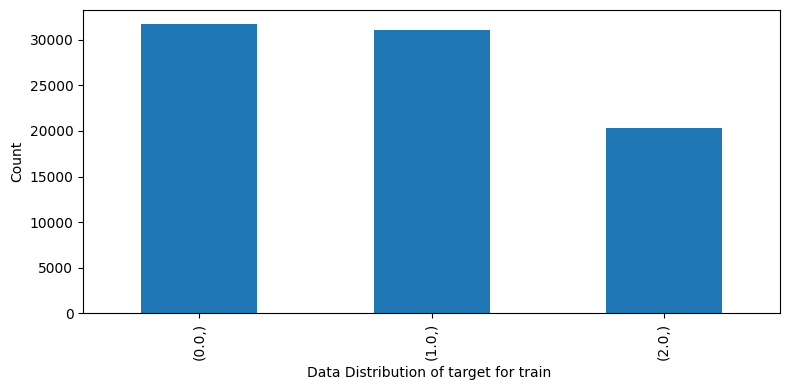

In [3]:
ax = train_mo[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for train ')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The validation set `X_va` and `y_va` is used during the training phase of the model to provide an unbiased evaluation of the model's performance and to fine-tune the model's parameters.

In [ ]:
train_ex_orig = train_ex.copy()
train_ex = train_mo.copy().drop(columns=['target', 'freq', 'num_experiment', 'HG_div_LG'])
train_ex.info()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Train Model samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

In [ ]:
train_ex = train_ex_orig.copy()
del train_ex_orig

In [49]:
from sklearn.model_selection import train_test_split

#train_mo_fs_RFE get from 'Have a quick round of feature selection and engineering'
train_set, validate_set = train_test_split(train_mo_fs_RFE, test_size=0.2, random_state=42)
test_set = test_mo_fs_RFE.copy()

y_tr = train_set.target
y_va = validate_set[['target']]
y_te = test_set.target

X_tr_freq_target = train_set.copy()
X_tr = train_set.drop(columns=['target', 'freq'])
X_te = test_set.drop(columns=['target', 'freq'])

X_va_freq_target = validate_set.copy()
X_te_freq_target = test_set.copy()
X_va = validate_set.drop(columns=[ 'target', 'freq'])



In [ ]:
X_tr.head()

In [ ]:
X_va_freq_target.head()

**Cojeture**: Look samples are homogenius

## Train many quick and dirty models 

In [77]:
import time
start_time = time.time()

In [78]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = dummy_clf.predict(X_va.to_numpy())

from sklearn.metrics import accuracy_score
dummy_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [79]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = logit_clf.predict(X_va.to_numpy())
logit_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [80]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = sgd_clf.predict(X_va.to_numpy())
sgd_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [81]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = svc_clf.predict(X_va.to_numpy())
svc_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [82]:
svc_score_scaled = 0

In [83]:
bayes_score=0
from sklearn.naive_bayes import MultinomialNB
#bayes_clf = MultinomialNB().fit(X_tr.to_numpy(), y_tr.to_numpy())
#bayes_score = accuracy_score(y_va.target.to_numpy(), y_pred)

# ValueError: Negative values in data passed to MultinomialNB (input X)

In [84]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = ridge_clf.predict(X_va.to_numpy())
ridge_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = neigh_clf.predict(X_va.to_numpy())
neigh_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_neigh = y_pred.copy()

In [86]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = tree_clf.predict(X_va.to_numpy())
tree_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_tree = y_pred.copy()

In [87]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = rnd_clf.predict(X_va.to_numpy())
rnd_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_rnd = y_pred.copy()

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = gb_clf.predict(X_va.to_numpy())
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_gb = y_pred.copy()

In [89]:
#11 features run in 484.99s, 5 features run in 278.63s
run_time = time.time() - start_time
print(f"Run Time: {run_time:.2f}s")


Run Time: 278.63s


In [90]:
lst_accuracy_score = [bayes_score, dummy_score, gb_score, logit_score, neigh_score, ridge_score, rnd_score, sgd_score, svc_score, svc_score_scaled, tree_score]
lst_name_clf = ['bayes', 'dummy', 'gb', 'logit', 'neigh', 'ridge', 'rnd', 'sgd', 'svc', 'svc_scaled', 'tree' ]


df_scores = pd.DataFrame({
"name_clf" : lst_name_clf,
"accuracy_score" : lst_accuracy_score
})

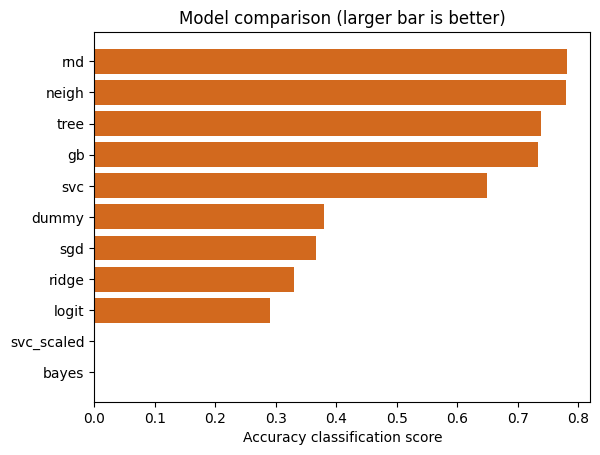

In [91]:
df_scores.sort_values('accuracy_score', ascending=True, inplace=True)
plt.barh(np.arange(len(lst_name_clf)), df_scores.accuracy_score, color='chocolate')
plt.yticks(np.arange(len(lst_name_clf)), df_scores.name_clf)
#plt.xlim(0, 1.2)
plt.title('Model comparison (larger bar is better)')
plt.xlabel('Accuracy classification score')
plt.show()

In [96]:
df_scores['accuracy_score'].tolist()

[0.0,
 0.0,
 0.28997713873180125,
 0.33028516424016363,
 0.3671038382866081,
 0.3805799542774636,
 0.6485982432920226,
 0.7342076765732162,
 0.7385392852845626,
 0.7799903742028637,
 0.7811334376128023]

## Measure and compare classifiers performance and frecuencies

`neigh`, `rnd`, `gb` and `tree` get the best score

### Cross-validation
Statistical method to evaluate generalization performance in a more stable and thorough way than using a split into training and test set.


In [61]:
from sklearn.model_selection import cross_validate, cross_val_score
#Run Time: 531.77s to 3, 4 CV

start_fold = 3
finish_fold = 5

lst_cv_neigh_tr, lst_cv_rnd_tr, lst_cv_gb_tr, lst_cv_tree_tr = [], [], [], []
lst_cv_neigh_va, lst_cv_rnd_va, lst_cv_gb_va, lst_cv_tree_va = [], [], [], []
lst_cv_neigh_te, lst_cv_rnd_te, lst_cv_gb_te, lst_cv_tree_te = [], [], [], []

start_time = time.time()


for cv in np.arange(start_fold,finish_fold,1):
    scores = cross_validate(neigh_clf, X_tr, y_tr, cv=cv, return_train_score=True)
    lst_cv_neigh_tr.append(scores['train_score'])
    lst_cv_neigh_va.append(scores['test_score'])
    
    scores_te = cross_val_score(neigh_clf, X_te, y_te, cv=cv)
    lst_cv_neigh_te.append(scores_te)
    #print (f"Neigh\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()}\nscores: {scores}")
    
    scores = cross_validate(rnd_clf, X_tr, y_tr, cv=cv, return_train_score=True)
    lst_cv_rnd_tr.append(scores['train_score'])
    lst_cv_rnd_va.append(scores['test_score'])

    scores_te = cross_val_score(rnd_clf, X_te, y_te, cv=cv)
    lst_cv_rnd_te.append(scores_te)
    #print (f"Rnd\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()})\nscores: {scores}")
    
    scores = cross_validate(gb_clf, X_tr, y_tr, cv=cv, return_train_score=True)
    lst_cv_gb_tr.append(scores['train_score'])
    lst_cv_gb_va.append(scores['test_score'])
    
    scores_te = cross_val_score(gb_clf, X_te, y_te, cv=cv)
    lst_cv_gb_te.append(scores_te)    
    #print (f"gb\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()})\nscores: {scores}")
    
    scores = cross_validate(tree_clf, X_tr, y_tr, cv=cv, return_train_score=True) 
    lst_cv_tree_tr.append(scores['train_score'])
    lst_cv_tree_va.append(scores['test_score'])

    scores_te = cross_val_score(tree_clf, X_te, y_te, cv=cv)
    lst_cv_tree_te.append(scores_te)
    #print (f"tree\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()})\nscores: {scores}")
    
    print(f"CV:{cv} ended")

run_time = time.time() - start_time
print(f"Run Time: {run_time:.2f}s")

array([3, 4])

In [91]:

n_fold_to_plot = 4


n_fold = n_fold_to_plot - start_fold
df_cv_neigh = pd.DataFrame(
    {"train":lst_cv_neigh_tr[n_fold],
     "val": lst_cv_neigh_va[n_fold],
     "test": lst_cv_neigh_te[n_fold]})
df_cv_neigh['n_fold'] = df_cv_neigh.index
df_cv_neigh['model'] = 'neigh'

df_cv_rnd = pd.DataFrame(
    {"train":lst_cv_rnd_tr[n_fold],
     "val": lst_cv_rnd_va[n_fold],
     "test": lst_cv_rnd_te[n_fold]})
df_cv_rnd['n_fold'] = df_cv_rnd.index
df_cv_rnd['model'] = 'rnd'

df_cv_gb = pd.DataFrame(
    {"train":lst_cv_gb_tr[n_fold],
     "val": lst_cv_gb_va[n_fold],
     "test": lst_cv_gb_te[n_fold]})
df_cv_gb['n_fold'] = df_cv_gb.index
df_cv_gb['model'] = 'gb'

df_cv_tree = pd.DataFrame(
    {"train":lst_cv_tree_tr[n_fold],
     "val": lst_cv_tree_va[n_fold],
     "test": lst_cv_tree_te[n_fold]})
df_cv_tree['n_fold'] = df_cv_tree.index
df_cv_tree['model'] = 'tree'

In [97]:
df_cv_tree
df_cv_tree[['train', 'val', 'test']].mean()

,train,val,test,n_fold,model
0,0.997273,0.733951,0.761885,0,tree
1,0.996992,0.737681,0.738036,1,tree
2,0.997072,0.732266,0.735451,2,tree
3,0.997032,0.730040,0.566612,3,tree


In [26]:
df_cv_total = pd.concat([df_cv_neigh, df_cv_rnd, df_cv_gb, df_cv_tree]).reset_index().drop(columns=['index'])
df_cv_total['n_fold']  = df_cv_total['n_fold'] + 1
df_cv_total[['train', 'val', 'n_fold', 'model']].sort_values(by='val', ascending = False)


,train,val,n_fold,model
1,0.837074,0.783647,2,neigh
5,0.996912,0.781602,2,rnd
2,0.838678,0.781120,3,neigh
0,0.839480,0.779436,1,neigh
4,0.997192,0.776307,1,rnd
3,0.841105,0.775525,4,neigh
6,0.997012,0.774502,3,rnd
7,0.996972,0.772276,4,rnd
8,0.740469,0.738584,1,gb
13,0.996992,0.737681,2,tree


## Analyze the types of errors the models make

`tree`, `gb`, `neih` and `rnd` get the best score

**Doubt**: Does `train_mo.columns.tolist()` belong to `clf.feature_importances_`?

In [94]:
#The importance of a feature is computed as the (normalized)
df_tmp = pd.DataFrame({
    "RandomForest": rnd_clf.feature_importances_,
    #"KNeighbors": neigh_clf.feature_importances_,
    "GradientBoosting": gb_clf.feature_importances_,
    "DecisionTree": tree_clf.feature_importances_},
    index=train_mo.columns.tolist()[2:])
_ = df_tmp.plot.bar(title="Importance of a feature for all frecuencies")


ValueError: Length of values (5) does not match length of index (11)

In [ ]:
mat_y_pred_tr = np.mat([y_pred_gb, y_pred_neigh, y_pred_rnd, y_pred_tree])
np_y_tr = y_tr.values
mat_y_pred_tr[0][0]
np.add()

In [ ]:
y_tr_sol = y_tr.copy() 
y_tr_sol['y_pred'] = y_pred 
y_tr_sol['true_pred'] = np.where(y_tr_sol['y_pred'] == y_tr_sol['target'],1,0)

X_tr_freq = pd.concat([y_tr_sol,X_tr_freq_target[['freq']]], axis=1)
X_tr_freq.head()

In [ ]:
%history
df_tmp = pd.DataFrame(
    {"False": X_tr_freq[X_tr_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_tr_freq[X_tr_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_tr_freq[X_tr_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']

Study best classifier to best frequency

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

In [ ]:
train_mo = train_pr_shifted.copy().rename(columns = {'Frequency (GHz)':'freq'})
train_mo_350 = train_mo[train_mo.freq == 350].drop(columns=['freq_target']) 
train_mo_350.info()

In [ ]:
train_mo_350['exp(HG)'] = train_mo_350['HG (mV)'].apply(lambda x: np.expm1(x/1000))
train_mo_350.head()

Binning, Discretization, Linear Models, and Trees

In [ ]:
warnings.filterwarnings('ignore')
freq = 350
ncols = 5
nrows = 3
nums_plastics = 0

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
    for c in range (ncols):
        t = train_mo_350['target'].value_counts().index.sort_values().tolist()
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[nums_plastics])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        nums_plastics = nums_plastics +1
plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_set_350, validate_set_350 = train_test_split(train_mo_350, test_size=0.2, random_state=42)

y_tr_350 = train_set_350.target
y_va_350 = validate_set_350[['target']]

X_tr_350 = train_set_350.drop(columns=['target'])
X_va_350 = validate_set_350.drop(columns=['target'])
X_tr_350.info()

In [ ]:
neigh_clf_350 = KNeighborsClassifier().fit(X_tr_350.to_numpy(), y_tr_350.to_numpy())
y_pred_350 = neigh_clf_350.predict(X_va_350.to_numpy())
neigh_score_350 = accuracy_score(y_va_350.target.to_numpy(), y_pred_350) #0.5896686159844055

In [ ]:

cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

Columns are type produced and rows are type preceved. 

* `Type 0`: 256 samples are produced and perceived well. 97 are perceived like type 2, 48 samples as type 4, and so on
* `Type 1`: 261 samples are produced and perceived well. 173 are perceived like type 9, 43 samples as type 12, and so on
* etc.

In [ ]:
freq = 350
ncols = 2
nrows = 10
i = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 28))
for r in range(nrows):
    for c in range (ncols):
        t = [0, 2, 0, 7, 1, 9, 1, 14, 2, 4, 4, 8, 5, 12, 8, 13, 9, 14, 12, 14]
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[i])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        #sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)x2',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[i]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        i = i + 1
plt.suptitle(f"Major mistakes produced and preceved of each plastic at {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_mo_350_t12 = train_mo_350[train_mo_350.target==12]['HG (mV)']
sns.kdeplot(train_mo_350_t12,color='#00BFC4', label='HG (mV)', fill =True)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='onehot-dense')
kb.fit(train_mo_350_t12.values.reshape(-1, 1))
train_mo_350_binned = kb.transform(train_mo_350_t12.values.reshape(-1, 1))
kb.bin_edges_[0]

In [ ]:
temp = np.array([1,2,3])
temp.reshape(-1, 1)
temp.reshape(1, -1)

np.random.random((1,10))[0]

## Have a quick round of feature selection and engineering
To improve estimators’ accuracy scores or to boost their performance high-dimensional features datasets

In [ ]:
from sklearn.feature_selection import RFE
n_features_to_select = 5
selector_rnd = RFE(rnd_clf, n_features_to_select=n_features_to_select, step=1)
selector_rnd = selector.fit(X_tr.to_numpy(), y_tr.to_numpy())
selector_gb = RFE(gb_clf, n_features_to_select=n_features_to_select, step=1)
selector_gb = selector.fit(X_tr.to_numpy(), y_tr.to_numpy())
selector_tree = RFE(tree_clf, n_features_to_select=n_features_to_select, step=1)
selector_tree = selector.fit(X_tr.to_numpy(), y_tr.to_numpy())

In [ ]:
df_temp = pd.DataFrame({
    "Feature": X_tr.columns.tolist(),
    "Random_Forest": selector_rnd.ranking_,
    "Gradient_Boost": selector_gb.ranking_,
    "Decision_Tree": selector_tree.ranking_})
df_temp['Total_Rank'] = df_temp["Random_Forest"] + df_temp["Gradient_Boost"] + df_temp["Decision_Tree"]
df_temp.sort_values(by='Total_Rank', ascending=True, inplace=True)

In [109]:
lst_low_ranking_RFE = df_temp["Feature"].tolist()[5:]

['var_HG', 'mean_LG', 'median_HG', 'median_LG', 'std_LG', 'var_LG']

In [110]:
train_mo_fs_RFE = train_mo.drop(columns=lst_low_ranking_RFE)
test_mo_fs_RFE = test_mo.drop(columns=lst_low_ranking_RFE)


Index(['target', 'freq', 'LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG',
       'std_HG'],
      dtype='object')

# Fine-tune the classifiers
## Fine-tune the hyperparameters
Finding the values of the important parameters of a model to provide the best 
generalization performanc to `neigh`, `rnd`, `gb` and `tree` get the best score)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#RandomizedSearchCV()
#GridSearchCV()
param_grid = {'weights':('uniform', 'distance'), 'n_neighbors': np.arange(5, 10, 1)}
neigh_clf = GridSearchCV(neigh_clf,param_grid, cv=3)
neigh_search = neigh_clf.fit(X_tr.to_numpy(), y_tr.to_numpy())

#pd.DataFrame(neigh_search.cv_results_).columns
pd.DataFrame(neigh_search.cv_results_).sort_values(by='rank_test_score')[['mean_test_score','params']]
neigh_search.best_params_ #{'n_neighbors': 9, 'weights': 'uniform'}


## Measure its performance on the test set 

In [11]:
score_te = []
y_pred_te = neigh_clf.predict(X_te.to_numpy())
neigh_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(neigh_score_te)

y_pred_te = rnd_clf.predict(X_te.to_numpy())
rnd_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(rnd_score_te)

y_pred_te = gb_clf.predict(X_te.to_numpy())
gb_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(gb_score_te)

y_pred_te = tree_clf.predict(X_te.to_numpy())
tree_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(tree_score_te)

In [21]:
df_score_te = pd.DataFrame({
    "model": ["neigh", "rnd", "gb", "tree"],
    "test_score":score_te},
                        )

df_score_te.sort_values(by="test_score", ascending=False )

,model,test_score
2,gb,0.463027
0,neigh,0.399040
1,rnd,0.374149
3,tree,0.362093


# Present your solution

In [ ]:
train_sol = train_mo.copy()
train_sol.head()

## Explain why your solution achieves the objective
To `neigh`, `rnd`, `gb` and `tree` get how works generalized classifiers

### Evaluate the accuracy of a classification of the best classificator

Compare true target with predictions to evaluate solutions

### K Neighbors

In [ ]:
y_pred = neigh_clf.predict(X_va.to_numpy())
y_pred_neigh = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_neigh = X_va_freq.copy()
X_va_freq.head()


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Total, Trues and fails predictions vs Frecuency to K Neighbors')
plt.tight_layout()
plt.show()

### Random Forest

**Notice**: Type of plastic are changed by numbers so `A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF` are `0`, `1`, `2`, `3`, `4`, etc. and so on

In [ ]:
y_pred = rnd_clf.predict(X_va.to_numpy())
y_pred_rnd = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_rnd = X_va_freq.copy()
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Total, Trues and fails predictions vs Frecuency to Random Forest')
plt.tight_layout()
plt.show()

### Gradient Boosting

In [ ]:
y_pred = gb_clf.predict(X_va.to_numpy())
y_pred_gb = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_gb = X_va_freq.copy()
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Total, Trues and fails predictions vs Frecuency to Gradient Boosting')
plt.tight_layout()
plt.show()

### Decision Tree

In [ ]:
y_pred = tree_clf.predict(X_va.to_numpy())
y_pred_tree = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_tree = X_va_freq.copy()
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Total, Trues and fails predictions vs Frecuency to Decision Tree')
plt.tight_layout()
plt.show()

**Insights** : 
* Central frecuencies have less fails than lower and upper frecuencies
* The frequency with the highest accuracy can now be identified: `350 Ghz`get").

### Count the number of times instances of types of plastics are misclassified
To `neigh`, `rnd`, `gb` and `tree` get how works generalized classifiers

**Code_Fixit**: change 

In [ ]:
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_neigh, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:3].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to K Neighbors ')
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_rnd, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:3].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to Random Forest ')
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_gb, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:3].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to Gradient Boost')
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_tree, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:3].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to Decision Tree')
disp.plot(ax=ax)

**Insights**:
* Count the number of times instances of class `0` (or `A1`) are classified as otherone class `1`, `2` and so on. The first row of this matrix shows 418 (of 1224 samples) were correctly classified and non class 806 (115+89+57+116+38+54+47+53+27+25+30+34+47+74) were wrongly classified. 115 as type 1,  89 as type 2 and so on. 
* Besides, the first columns shows that class `0`  were wrongly classified 1795 (159+170+119+197+85+119+112+127+99+86+119+121+114+168) by other class. He might be the plastic which was most often confused by other plastic.


### Of validate dataset, explore what frecuencies classified by target 
#### K Neighbors

In [ ]:
X_va_inaccurate = X_va_freq_neigh[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:4].tolist()
ncols = 2
nrows = 2
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Predictions by target vs Frecuency. K Neighbors", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [ ]:
X_va_freq = X_va_freq_neigh.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies K Neighbors are: {lst_best_freq}")
lst_best_freq_neigh = lst_best_freq.copy()

#### Random Forest

In [ ]:
X_va_inaccurate = X_va_freq_rnd[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:4].tolist()
ncols = 2
nrows = 2
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Predictions by target vs Frecuency. Random Forest", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [ ]:
X_va_freq = X_va_freq_rnd.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies Random Forest are: {lst_best_freq}")
lst_best_freq_rnd = lst_best_freq.copy()

#### Gradient Boost

In [ ]:
X_va_inaccurate = X_va_freq_gb[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:4].tolist()
ncols = 2
nrows = 2
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Predictions by target vs Frecuency. Gradient Boost", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [ ]:
X_va_freq = X_va_freq_gb.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies Gradient Boost are: {lst_best_freq}")
lst_best_freq_gb = lst_best_freq.copy()

#### Decision Tree

In [ ]:
X_va_inaccurate = X_va_freq_tree[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:4].tolist()
ncols = 2
nrows = 2
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Predictions by target vs Frecuency. Decision Tree", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [ ]:
X_va_freq = X_va_freq_tree.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies Gradient Boost are: {lst_best_freq}")
lst_best_freq_tree = lst_best_freq.copy()

In [ ]:
print (f" \nK Neighbors frecuencies: \t{lst_best_freq_neigh} \nRandom Forest frecuencies: \t{lst_best_freq_rnd} \nGradient Boost frecuencies: \t{lst_best_freq_gb} \nDecision Tree frecuencies: \t{lst_best_freq_tree}")

**Insights**: 
'B1', 'C1', 'E1', 'REF' 

* The material that is detected with the highest accuracy can now be identified: Type 3, 4, 11, 12, and 14 at various frequencies, type 8 and 15 at 350, type 13 at 250.
* The material with the lowest accuracy can now be identified, type 2 and 9 show failures at all frequencies.